# **SVM (Support Vector Machine)**
* Support Vector Machine (SVM) is a supervised learning algorithm used for classification, regression tasks and outliers detection.
* SVM finds the optimal decision boundary (hyperplane) that maximizes the mrgin between different classes.

### Support Vector Machine (SVM) Terminology:
1. Hyperplane: A decision boundary separating different classes in feature space, represented by the equation wx + b = 0 in linear classification.
2. Support Vectors: The closest data points to the hyperplane, crucial for determining the hyperplane and margin in SVM.
3. Margin: The distance between the hyperplane and the support vectors. SVM aims to maximize this margin for better classification performance.
4. Kernel: A function that maps data to a higher-dimensional space, enabling SVM to handle non-linearly separable data.
5. Hard Margin: A maximum-margin hyperplane that perfectly separates the data without misclassifications.
6. Soft Margin: Allows some misclassifications by introducing slack variables, balancing margin maximization and misclassification penalties when data is not perfectly separable.
7. C: A regularization term balancing margin maximization and misclassification penalties. A higher C value enforces a stricter penalty for misclassifications.
8. Hinge Loss: A loss function penalizing misclassified points or margin violations, combined with regularization in SVM.
9. Dual Problem: Involves solving for Lagrange multipliers associated with support vectors, facilitating the kernel trick and efficient computation.

### Types of SVM

1. **Linear SVM**:
- Used when the data is linearly separable
- The decision boundary is a straight line(2D) or a hyperplane(Higher Dimentions).
- ### Equation of the Hyperplane:
    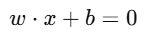

    where:
    - w = Weight vector
    - 𝑥 = Input feature vector
    - 𝑏 = Bias
2. **Non-Linear SVM**:
- Used when the data is not linearly separable.
- It uses the Kernel Trick to transform the data into a higher-dimensional space where it becomes linearly separable
- **Kernel Functions**:
    1. Polynomial Kernel:
    
        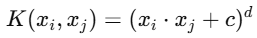
        - Suitable for data with polynomial relationships.
    2. Radial Basis Function (RBF) Kernel:
        
        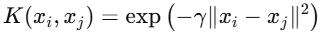
        - Most commonly used.
        - Maps data to an infinite-dimensional space.
    3. Sigmoid Kernel:
    
        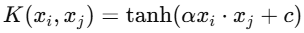
        - Similar to a neural network activation function.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

### Load a Dataset

In [2]:
iris = datasets.load_iris()
X = iris.data[:, :2]  
y = (iris.target != 0) * 1 

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

### Train the SVM Model

In [4]:
svm = SVC(kernel='linear', C=1.0)
svm.fit(X_train, y_train)

SVC(kernel='linear')

In [5]:
y_pred = svm.predict(X_test)

### Evaluation

In [6]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        20

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



### Visualizing SVM Decision Boundary

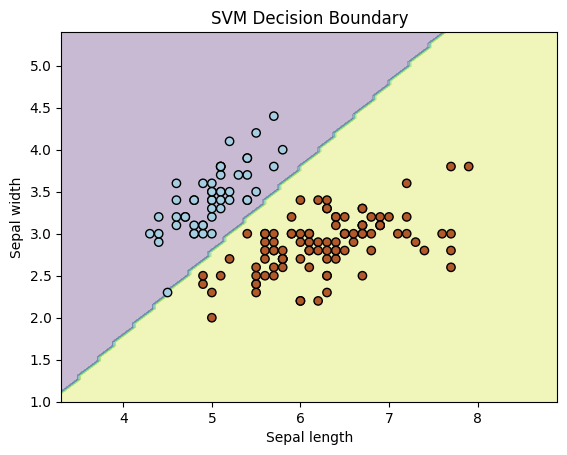

In [7]:
# Create a meshgrid to plot decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))

Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title("SVM Decision Boundary")
plt.show()